In [2]:
import pandas as pd
import numpy as np
import ast
import missingno as msno
from geopy.geocoders import Nominatim
import geopandas as gpd
import re
import pycountry_convert as pc
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amekk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amekk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
import dataframes as RAW
import cleaning as CLEAN

In [4]:
#Add summaries to corresponding characters (can be avoided by using RAW.summaries in functions)
merged = pd.merge(RAW.character_data, RAW.summaries, on='Wiki ID')

In [5]:
merged_test = merged.iloc[0:100,:]
merged_test = merged_test.dropna(subset=['Character name'])

In [6]:
def count_mentions(summary, character_name):
    return summary.lower().count(character_name.lower())

merged_test['Mentions_Count'] = merged_test.apply(lambda row: count_mentions(row['Summary'], row['Character name']), axis=1)

In [7]:
def count_partial_mentions(summary, character_name):
    count = 0
    summary_lower = summary.lower()
    character_name_parts = character_name.lower().split()  # Split the character name into parts

    # Count occurrences of each part of the character's name in the summary
    for part in character_name_parts:
        count += summary_lower.count(part)

    return count

merged_test['Partial_Mentions_Count'] = merged_test.apply(lambda row: count_partial_mentions(row['Summary'], row['Character name']), axis=1)

In [8]:
# Group by 'Wiki_ID' and find the top two actors with the most mentions for each movie
top_actors_per_movie = merged_test.groupby('Wiki ID').apply(lambda x: x.nlargest(2, 'Partial_Mentions_Count'))
# Assign roles to the top two actors for each movie
top_actors_per_movie['Role'] = ['First Role', 'Second Role'] * (len(top_actors_per_movie) // 2)
# Drop the groupby index to obtain a flat DataFrame
top_actors_per_movie = top_actors_per_movie.droplevel(0)

In [9]:
# Assuming 'merged' is your DataFrame containing 'Character name', 'Wiki ID', and other columns

# Find rows with NaN in 'Character name'
nan_character_name_rows = merged[merged['Character name'].isnull()]

# Extract unique Wiki IDs from rows with NaN in 'Character name'
nan_character_wiki_ids = nan_character_name_rows['Wiki ID'].unique()

# Filter rows from 'merged' where 'Character name' is not NaN or Wiki ID is not in nan_character_wiki_ids
filtered_merged = merged[(~merged['Character name'].isnull()) | (~merged['Wiki ID'].isin(nan_character_wiki_ids))]

# Now 'filtered_merged' contains rows without NaN in 'Character name' and without rows sharing the same Wiki ID as those with NaN in 'Character name'
filtered_merged_test = filtered_merged.iloc[0:100,:]

In [10]:
filtered_merged_test['Mentions_Count'] = filtered_merged_test.apply(lambda row: count_mentions(row['Summary'], row['Character name']), axis=1)
filtered_merged_test['Partial_Mentions_Count'] = filtered_merged_test.apply(lambda row: count_partial_mentions(row['Summary'], row['Character name']), axis=1)

C:\Users\amekk\AppData\Local\Temp\ipykernel_9004\3508653556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_test['Mentions_Count'] = filtered_merged_test.apply(lambda row: count_mentions(row['Summary'], row['Character name']), axis=1)
C:\Users\amekk\AppData\Local\Temp\ipykernel_9004\3508653556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_test['Partial_Mentions_Count'] = filtered_merged_test.apply(lambda row: count_partial_mentions(row['Summary'], row['Character nam

In [11]:
# Assuming 'filtered_merged_test' is your DataFrame after filtering

# Group by 'Wiki ID' and find the top two actors with the most mentions for each movie
top_actors_per_movie = filtered_merged_test.groupby('Wiki ID').apply(lambda x: x.nlargest(2, 'Partial_Mentions_Count'))

# Assign roles dynamically based on the number of actors per movie
role_list = ['First Role', 'Second Role'] * (len(top_actors_per_movie) // 2)
if len(top_actors_per_movie) % 2 != 0:
    role_list.append('First Role')  # Adding an extra role for odd-length groups

# Assign roles to the top two actors for each movie
top_actors_per_movie['Role'] = role_list[:len(top_actors_per_movie)]

# Drop the groupby index to obtain a flat DataFrame
top_actors_per_movie = top_actors_per_movie.droplevel(0)

In [12]:
top_actors_per_movie

,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID,Summary,Mentions_Count,Partial_Mentions_Count,Role
38,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,/m/0jtx5h,/m/03jnxf4,/m/01l1b90,A young 20-year-old named Jody lives with his...,25,25,First Role
37,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,/m/0jtx5t,/m/03jnxj_,/m/0blbxk,A young 20-year-old named Jody lives with his...,22,22,Second Role
173,167857,/m/016fyc,1994-10,Dave Kujan,1952-05-15,M,1.910,/m/0xnvg,Chazz Palminteri,NaN,/m/045x9r0,/m/02xhr5m,/m/02t_v1,"On a ship in San Pedro Bay, a faceless figure ...",1,13,First Role
171,167857,/m/016fyc,1994-10,Kobayashi,1946-02-07,M,1.750,/m/02w7gg,Pete Postlethwaite,NaN,/m/0k6t7w,/m/02xhr51,/m/018swb,"On a ship in San Pedro Bay, a faceless figure ...",9,9,Second Role
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,"Set in the second half of the 22nd century, th...",0,9,First Role
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,"Set in the second half of the 22nd century, th...",1,5,Second Role
155,1369204,/m/04x8zs,1939,Empress Carlotta von Hapsburg,1908-04-05,F,1.600,NaN,Bette Davis,30.0,/m/02tbd6m,/m/0h0ypzn,/m/0h1m9,The film focuses on the conflict between Maxim...,0,2,First Role
21,2238856,/m/06yc6v,2005-01,Richard Swersey,1959-09-11,M,1.780,NaN,John Hawkes,NaN,/m/0k0jnm,/m/0g98dqk,/m/0785v8,The structure of the film consists of several ...,0,4,Second Role
24,2238856,/m/06yc6v,2005-01,Robby Swersey,1998-04-14,M,NaN,NaN,Brandon Ratcliff,NaN,/m/09hyqd5,/m/0g98dtr,/m/0287qtg,The structure of the film consists of several ...,0,4,First Role
124,4951456,/m/0cws46,1989,Kathleen Crowe,1946-08-30,F,1.720,/m/033tf_,Peggy Lipton,42.0,/m/040s84p,/m/0h2stn2,/m/06xz0d,A Japanese businessman sees a woman being grop...,0,10,Second Role


In [13]:
# Merge based on the common Wiki ID or Freebase ID
merged_data = pd.merge(top_actors_per_movie, RAW.movie_data_scraped[['Wiki ID', 'Movie name','Revenue','Wins','Nominations','Runtime','Languages','Countries','Genres','IMDb rating']], on='Wiki ID', how='left')

In [14]:
merged_data

,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,...,Role,Movie name,Revenue,Wins,Nominations,Runtime,Languages,Countries,Genres,IMDb rating
0,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,...,First Role,Baby Boy,29381649.0,1.0,14.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",6.4
1,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,...,Second Role,Baby Boy,29381649.0,1.0,14.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",6.4
2,167857,/m/016fyc,1994-10,Dave Kujan,1952-05-15,M,1.910,/m/0xnvg,Chazz Palminteri,NaN,...,First Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,167857,/m/016fyc,1994-10,Kobayashi,1946-02-07,M,1.750,/m/02w7gg,Pete Postlethwaite,NaN,...,Second Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,First Role,Ghosts of Mars,14010832.0,NaN,2.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9
5,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,Second Role,Ghosts of Mars,14010832.0,NaN,2.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9
6,1369204,/m/04x8zs,1939,Empress Carlotta von Hapsburg,1908-04-05,F,1.600,NaN,Bette Davis,30.0,...,First Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2238856,/m/06yc6v,2005-01,Richard Swersey,1959-09-11,M,1.780,NaN,John Hawkes,NaN,...,Second Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2238856,/m/06yc6v,2005-01,Robby Swersey,1998-04-14,M,NaN,NaN,Brandon Ratcliff,NaN,...,First Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4951456,/m/0cws46,1989,Kathleen Crowe,1946-08-30,F,1.720,/m/033tf_,Peggy Lipton,42.0,...,Second Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
filtered_df_countries = merged_data[merged_data['Countries'].notnull()]
filtered_df_countries['Country'] = filtered_df_countries['Countries'].apply(lambda x: re.findall(r'": "(.*?)"', x))
filtered_df_countries = filtered_df_countries[['Wiki ID', 'Country']]

filtered_df_language = merged_data[merged_data['Languages'].notnull()]
filtered_df_language['Language'] = filtered_df_language['Languages'].apply(lambda x: re.findall(r'": "(.*?)"', x))
filtered_df_language = filtered_df_language[['Wiki ID', 'Language']]

filtered_df_genres = merged_data[merged_data['Genres'].notnull()]
filtered_df_genres['Genre'] = filtered_df_genres['Genres'].apply(lambda x: re.findall(r'": "(.*?)"', x))
filtered_df_genres = filtered_df_genres[['Wiki ID', 'Genre']]

C:\Users\amekk\AppData\Local\Temp\ipykernel_9004\888563506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_countries['Country'] = filtered_df_countries['Countries'].apply(lambda x: re.findall(r'": "(.*?)"', x))
C:\Users\amekk\AppData\Local\Temp\ipykernel_9004\888563506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_language['Language'] = filtered_df_language['Languages'].apply(lambda x: re.findall(r'": "(.*?)"', x))
C:\Users\amekk\AppData\Local\Temp\ipykernel_9004\888563506.

In [16]:
final_data = pd.merge(merged_data, filtered_df_language, on = 'Wiki ID', how='left')
final_data = pd.merge(final_data, filtered_df_genres, on = 'Wiki ID', how = 'left')
final_data = pd.merge(final_data, filtered_df_countries, on = 'Wiki ID', how = 'left')

final_data.drop_duplicates(subset=['Character name', 'Actor name'], inplace=True)

# Drop columns by name
columns_to_drop = ['Languages', 'Countries', 'Genres']  # Replace with the names of the columns you want to drop
final_data.drop(columns=columns_to_drop, inplace=True)
final_data = final_data.applymap(lambda x: ', '.join(x) if isinstance(x, list) else x)
final_data

,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,...,Role,Movie name,Revenue,Wins,Nominations,Runtime,IMDb rating,Language,Genre,Country
0,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,/m/0x67,Tyrese Gibson,22.0,...,First Role,Baby Boy,29381649.0,1.0,14.0,123.0,6.4,English Language,"Crime Fiction, Drama, Coming of age",United States of America
8,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,/m/0x67,Taraji P. Henson,30.0,...,Second Role,Baby Boy,29381649.0,1.0,14.0,123.0,6.4,English Language,"Crime Fiction, Drama, Coming of age",United States of America
16,167857,/m/016fyc,1994-10,Dave Kujan,1952-05-15,M,1.910,/m/0xnvg,Chazz Palminteri,NaN,...,First Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,167857,/m/016fyc,1994-10,Kobayashi,1946-02-07,M,1.750,/m/02w7gg,Pete Postlethwaite,NaN,...,Second Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,First Role,Ghosts of Mars,14010832.0,NaN,2.0,98.0,4.9,English Language,"Thriller, Science Fiction, Horror, Adventure, ...",United States of America
26,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,Second Role,Ghosts of Mars,14010832.0,NaN,2.0,98.0,4.9,English Language,"Thriller, Science Fiction, Horror, Adventure, ...",United States of America
34,1369204,/m/04x8zs,1939,Empress Carlotta von Hapsburg,1908-04-05,F,1.600,NaN,Bette Davis,30.0,...,First Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2238856,/m/06yc6v,2005-01,Richard Swersey,1959-09-11,M,1.780,NaN,John Hawkes,NaN,...,Second Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2238856,/m/06yc6v,2005-01,Robby Swersey,1998-04-14,M,NaN,NaN,Brandon Ratcliff,NaN,...,First Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,4951456,/m/0cws46,1989,Kathleen Crowe,1946-08-30,F,1.720,/m/033tf_,Peggy Lipton,42.0,...,Second Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# load ethnicites

def load_ethnicities(ethnicity_file, etchnicity_clusters):
    """
        Load ethnicities dataset and add clusters

        Clusters:
        {1: 'White', 
         2: 'Black / African American', 
         3: 'Asian', 
         4: 'American Indian / Alaska Native', 
         5: 'Native Hawaiian / Other Pacific Islander',
         6: 'Other'}
    """
    ethnicities = pd.read_csv(ethnicity_file, sep='\t', header=None, names=['freebase_ethnicity_id', 'ethnicity_name', 'cluster_id', 'is_hispanic'])

    ethnicities['ethnicity_cluster_name'] = ethnicities['cluster_id'].map(etchnicity_clusters)
    ethnicities['is_hispanic'] = ethnicities['is_hispanic'].map({'-': 0, '+': 1}).astype(int)

    return ethnicities


ethnicities = load_ethnicities(ETHNICITY_FILE, ETHNICITY_CLUSTERS)
ethnicities.head()

NameError: name 'ETHNICITY_FILE' is not defined

Here, we extract all of the features that we will possibly use for the model. But before selecting them, we need to 

In [18]:
# Extracting column names from the 'merged' dataframe
feature_names = final_data.columns.tolist()

# Creating a new dataframe with feature names
feature_df = pd.DataFrame({'Feature Names': feature_names})
feature_df

,Feature Names
0,Wiki ID
1,Freebase ID
2,Release date
3,Character name
4,Actor DOB
5,Actor gender
6,Actor height
7,Actor ethnicity
8,Actor name
9,Actor age at release


c:\Users\amekk\anaconda3\envs\ada\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


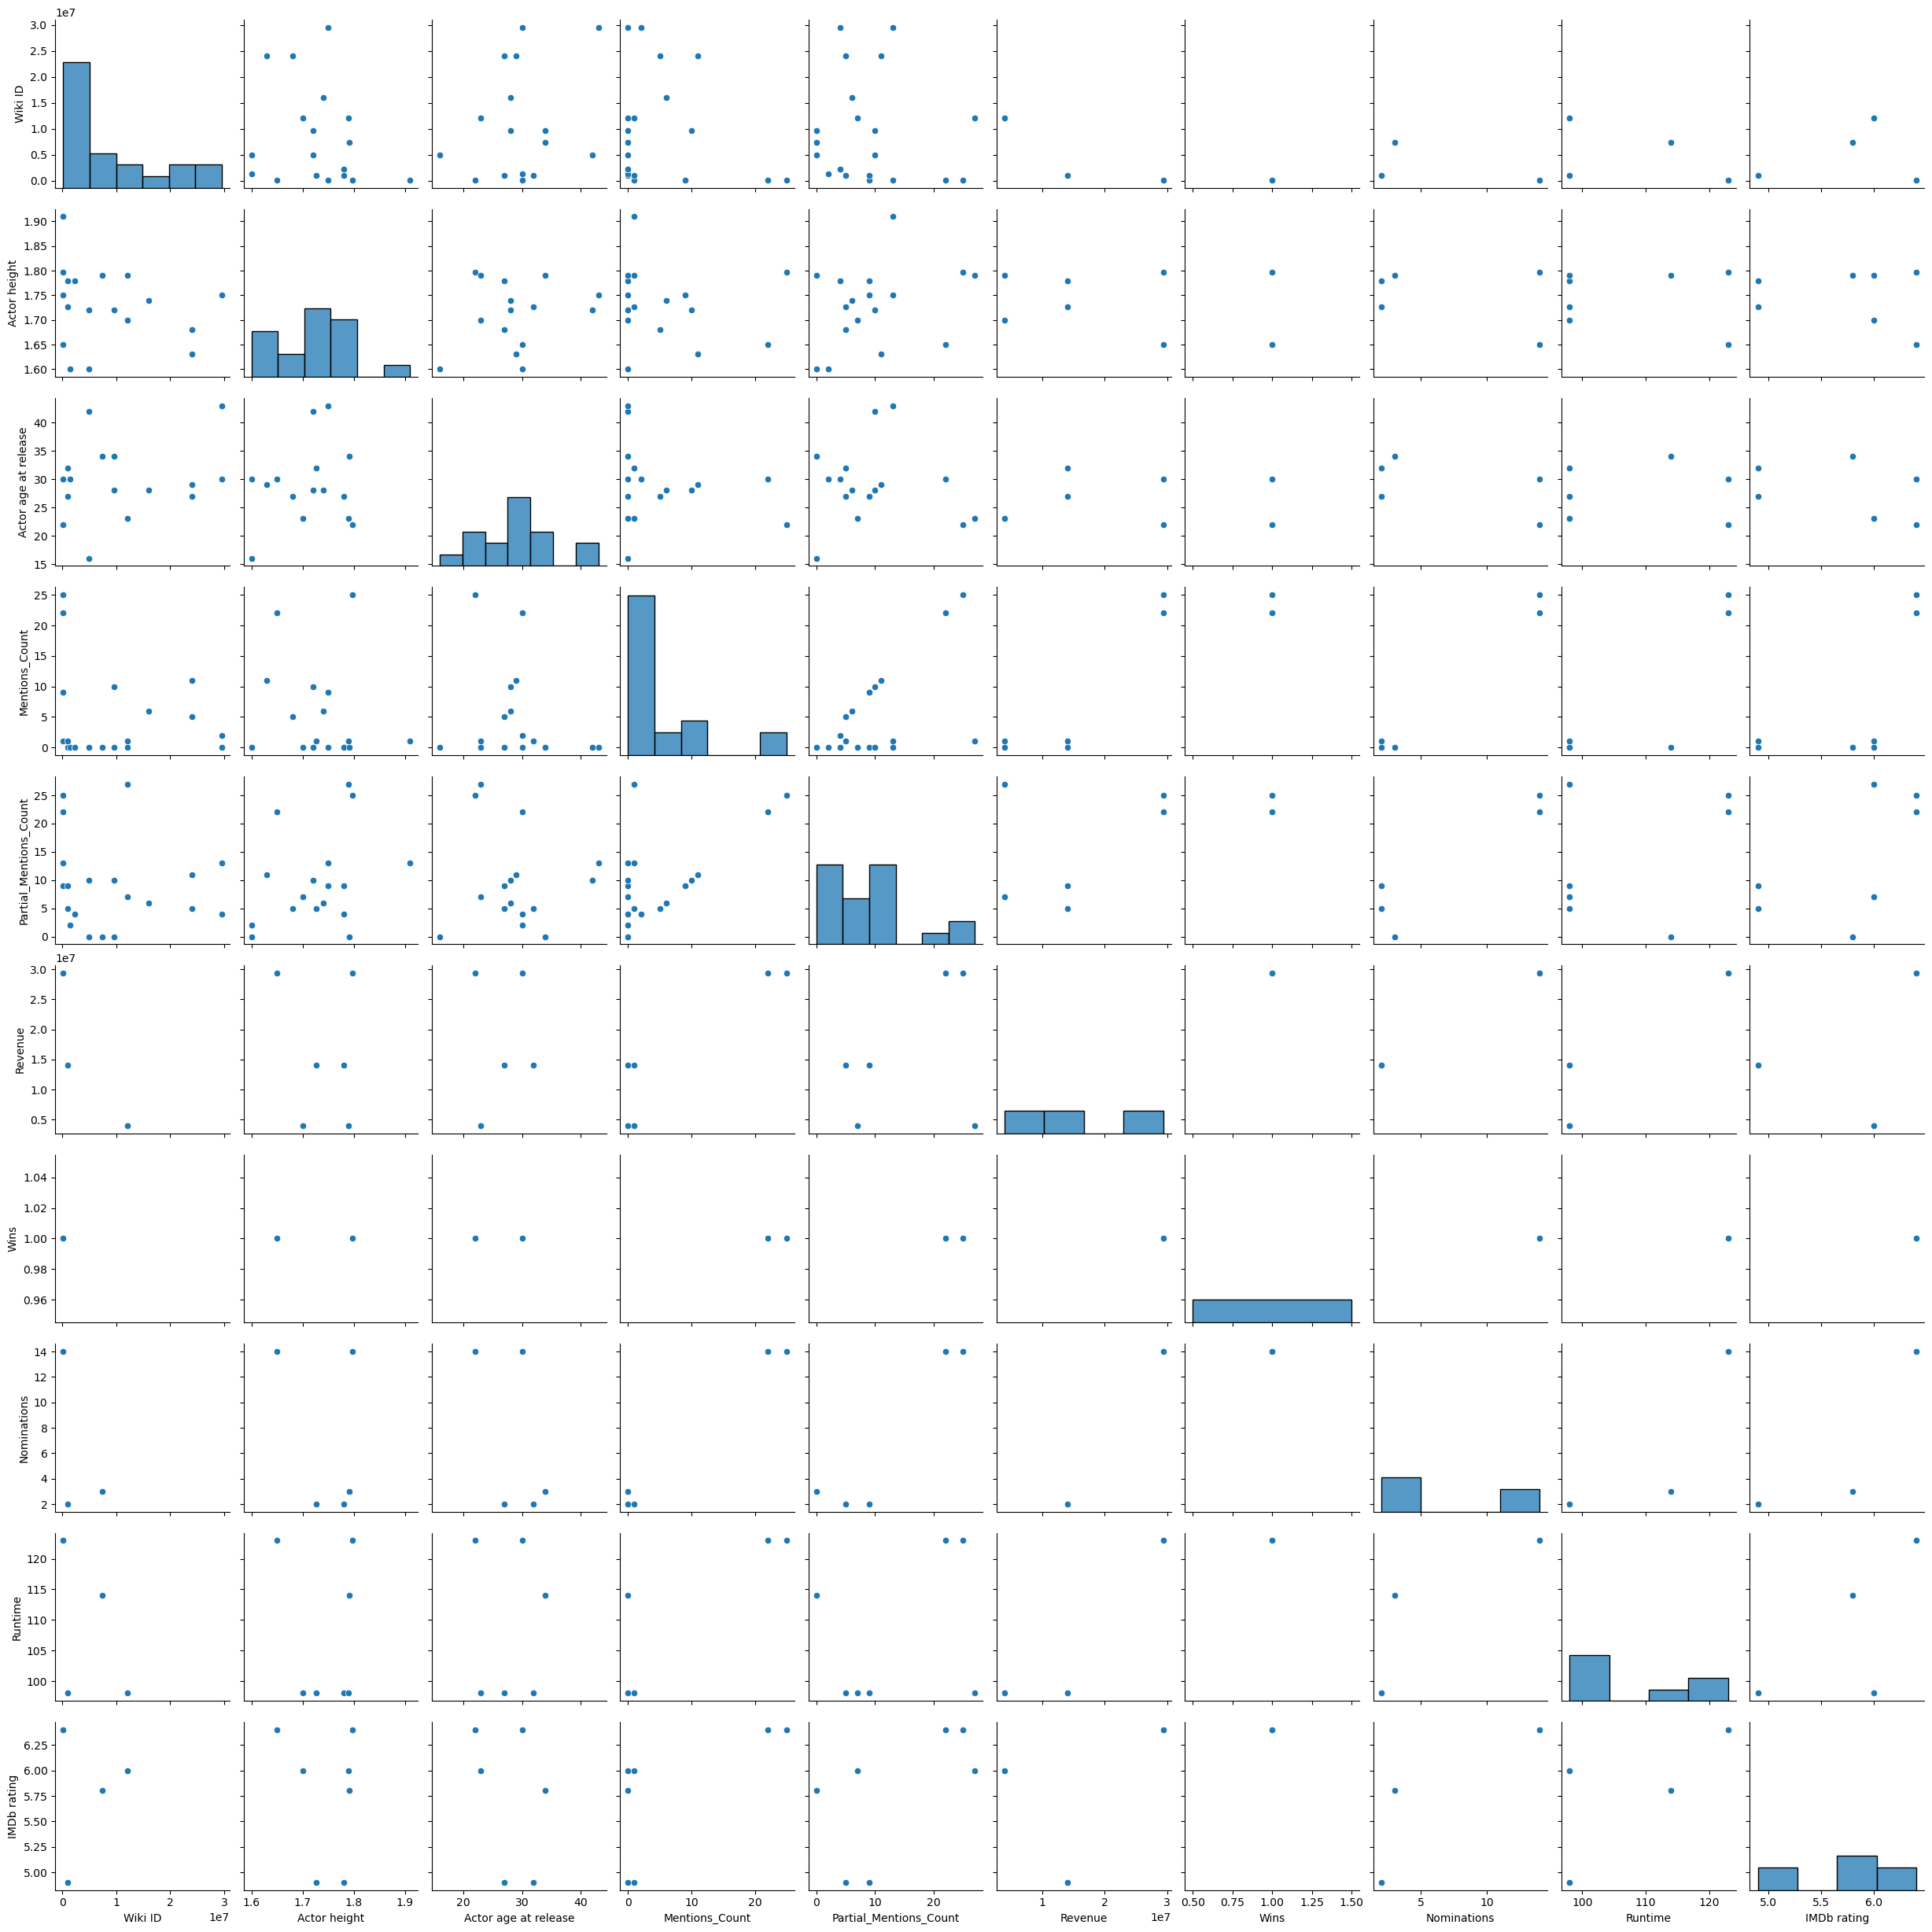

In [19]:
# Separate continuous and categorical columns
continuous_cols = final_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = final_data.select_dtypes(include=['object']).columns

# Create pair plots for continuous variables
sns.pairplot(final_data[continuous_cols])
plt.show()

# For categorical variables, you can create a count plot or a box plot for each pair
#for col1 in categorical_cols:
#    for col2 in categorical_cols:
#        if col1 != col2:
#            sns.countplot(x=col1, hue=col2, data=final_data)
#            plt.show()

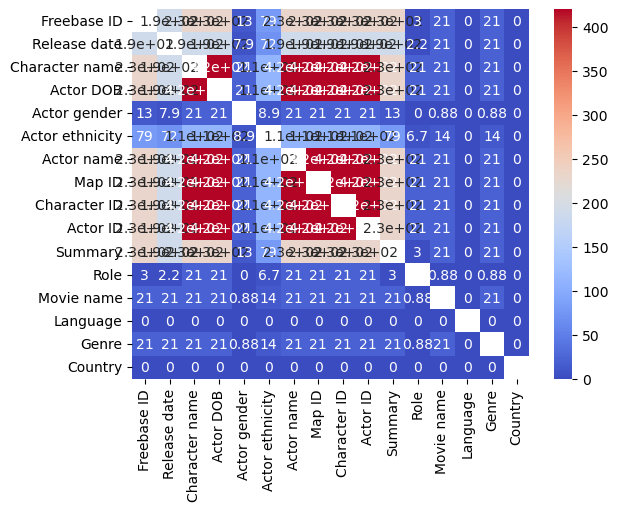

In [ ]:

from scipy.stats import chi2_contingency


# Calculate chi-square values for each pair of categorical variables
def calculate_chi2(df):
    chi2_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
    for i in df.columns:
        for j in df.columns:
            if i != j:
                contingency_table = pd.crosstab(df[i], df[j])
                chi2, _, _, _ = chi2_contingency(contingency_table)
                chi2_matrix.loc[i, j] = chi2
    return chi2_matrix

# Get chi-square matrix
chi2_matrix = calculate_chi2(final_data[categorical_cols])

# Create a heatmap
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm')
plt.show()

In [42]:
from SPARQLWrapper import SPARQLWrapper, JSON

def get_ethnicity(freebase_id):
    url = "https://query.wikidata.org/sparql"
    query = ("""
    SELECT ?item ?itemLabel WHERE {
      ?item wdt:P646 '"""+ str(freebase_id)+ """'.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    """
    )
    sparql = SPARQLWrapper(url)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)

    try:
        results = sparql.query().convert()
        if results["results"]["bindings"]:
            label = results["results"]["bindings"][0]["itemLabel"]["value"]
            return label
        else:
            return "Unknown"
    except Exception as e:
        return np.nan

# ATTENTION METTRE LES 2 DANS DES COLONNES DIFF ET MAPPER: id + VRAI ET METTRE EN CSV

In [44]:
final_data['Actor ethnicity'] = final_data['Actor ethnicity'].apply(lambda x: get_ethnicity(x))
final_data


,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,...,Movie name,Revenue,Wins,Nominations,Runtime,IMDb rating,Language,Genre,Country,hello
0,156558,/m/014k4y,2001-06-27,Jody,1978-12-30,M,1.797,African Americans,Tyrese Gibson,22.0,...,Baby Boy,29381649.0,1.0,14.0,123.0,6.4,English Language,"Crime Fiction, Drama, Coming of age",United States of America,African Americans
8,156558,/m/014k4y,2001-06-27,Yvette,1970-09-11,F,1.650,African Americans,Taraji P. Henson,30.0,...,Baby Boy,29381649.0,1.0,14.0,123.0,6.4,English Language,"Crime Fiction, Drama, Coming of age",United States of America,African Americans
16,167857,/m/016fyc,1994-10,Dave Kujan,1952-05-15,M,1.910,Italian Americans,Chazz Palminteri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian Americans
17,167857,/m/016fyc,1994-10,Kobayashi,1946-02-07,M,1.750,English people,Pete Postlethwaite,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English people
18,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,Unknown,Natasha Henstridge,27.0,...,Ghosts of Mars,14010832.0,NaN,2.0,98.0,4.9,English Language,"Thriller, Science Fiction, Horror, Adventure, ...",United States of America,Unknown
26,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,African Americans,Ice Cube,32.0,...,Ghosts of Mars,14010832.0,NaN,2.0,98.0,4.9,English Language,"Thriller, Science Fiction, Horror, Adventure, ...",United States of America,African Americans
34,1369204,/m/04x8zs,1939,Empress Carlotta von Hapsburg,1908-04-05,F,1.600,Unknown,Bette Davis,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
35,2238856,/m/06yc6v,2005-01,Richard Swersey,1959-09-11,M,1.780,Unknown,John Hawkes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
36,2238856,/m/06yc6v,2005-01,Robby Swersey,1998-04-14,M,NaN,Unknown,Brandon Ratcliff,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
37,4951456,/m/0cws46,1989,Kathleen Crowe,1946-08-30,F,1.720,Irish Americans,Peggy Lipton,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irish Americans


In [ ]:
# Calculate correlations
correlation = final_data[continuous_cols].corr()

# Extract correlation of features with 'Revenue' and 'Nominations'
revenue_corr = correlation['Revenue'].abs().sort_values(ascending=False)
nominations_corr = correlation['Nominations'].abs().sort_values(ascending=False)

# Select top features for 'Revenue' and 'Nominations'
top_revenue_features = revenue_corr[1:]  # Excluding 'Revenue' itself
top_nominations_features = nominations_corr[1:]  # Excluding 'Nominations' itself

# You can now use top_revenue_features and top_nominations_features for your ML algorithm

print(top_revenue_features)
print(top_nominations_features)

Nominations               1.000000
Runtime                   0.919751
Mentions_Count            0.916186
Wiki ID                   0.835280
Partial_Mentions_Count    0.374878
IMDb rating               0.371539
Actor age at release      0.245294
Actor height              0.183002
Wins                           NaN
Name: Revenue, dtype: float64
Revenue                   1.000000
Mentions_Count            0.992965
Partial_Mentions_Count    0.932094
IMDb rating               0.902206
Runtime                   0.886392
Actor age at release      0.557714
Wiki ID                   0.469820
Actor height              0.359674
Wins                           NaN
Name: Nominations, dtype: float64


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
class FeatureSelector:

    def __init__(self, method, numbers):
        self.method = method.lower()
        self.numbers = numbers

    def apply(self, features, targets):
        features_names = [column for column in features.columns 
                          if column not in ['reference']]
        features_selection = features.copy()
        features_selection.insert(0, 'reference', targets)
        features_selection = features_selection.dropna(axis=0, how='any', inplace=False)
        ranks = self.rank_features(features_selection[features_names],
                                   features_selection['reference'],
                                   self.method)
        del features_selection
        return self.select_features(ranks, self.numbers)

    @staticmethod
    def select_features(ranks, feature_num):
        ranks.sort_values(by='ranks', axis=0, ascending=False, inplace=True,
                          kind='quicksort', ignore_index=True)
        return ranks['feature_names'].iloc[: feature_num].tolist()

    @staticmethod
    def rank_features(features, reference, method):
        def univariate_selection(data, ref):
            selector = SelectKBest(f_regression, k="all")
            scores = selector.fit(data, ref).scores_
            return scores / np.nansum(scores)

        def lasso_selection(data, ref):
            alphas = np.arange(0.01, 0.3, 0.01)
            coefficients = np.empty([len(alphas), data.shape[1]])
            for row, alpha in enumerate(alphas):
                selector = SelectFromModel(Lasso(alpha=alpha), prefit=False)
                coefficients[row, :] = selector.fit(data, ref).estimator_.coef_
            coefficients = np.abs(coefficients)
            real_ranks = np.nansum(coefficients, axis=0)
            return real_ranks / np.nansum(real_ranks)

        if method == 'lasso':
            ranks = lasso_selection(features, reference)
        elif method == 'univariate':
            ranks = univariate_selection(features, reference)
        elif method == 'hybrid':
            rank_lasso = lasso_selection(features, reference)
            rank_univariate = univariate_selection(features, reference)
            rank_combined = rank_lasso + rank_univariate
            ranks = rank_combined / np.nansum(rank_combined)
        else:
            raise TypeError("Feature selection method is not supported")
        return pd.DataFrame({
            'feature_names': features.columns,
            'ranks': ranks,
        })
    

feature_selection_method = 'univariate'
feature_selection_numbers = 4
features_list = FeatureSelector(feature_selection_method, feature_selection_numbers).apply(features.iloc[i_val], targets[i_val])
print(f"Selected features:{features_list}")

In [55]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class FeatureSelection:

    def __init__(self, X, y):
        self.X = pd.DataFrame(X)
        self.y = pd.DataFrame(y)

        # Separate continuous and categorical features
        self.continuous_features = list(self.X.select_dtypes(include=np.number).columns)
        self.categorical_features = list(self.X.select_dtypes(exclude=np.number).columns)

    def select_best_features(self, k):
        # Select the best k continuous features
        continuous_selector = SelectKBest(f_classif, k=k)
        continuous_selected_features = continuous_selector.fit_transform(self.X[self.continuous_features], self.y)

        # Encode categorical features
        categorical_encoder = OneHotEncoder()
        categorical_selected_features = categorical_encoder.fit_transform(self.X[self.categorical_features])

        # Combine selected features
        selected_features = np.concatenate((continuous_selected_features, categorical_selected_features.toarray()), axis=1)
        #print(selected_features)

        return selected_features

In [1]:
selected_columns = ['Nominations', 'hello', 'Runtime', 'Country']  

X = np.array(final_data[selected_columns])
y = np.array(final_data['Revenue'])

feature_selection = FeatureSelection(X, y)
print(feature_selection)

NameError: name 'np' is not defined

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming final_data contains predictors and 'Revenues'

# Define categorical and numerical columns
categorical_cols = ['categorical_feature1', 'categorical_feature2']
numerical_cols = ['numerical_feature1', 'numerical_feature2']

# Create a preprocessor for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Combine preprocessor with feature selection method and model
feature_selection_model = SelectKBest(score_func=f_regression, k=5)  # Example: Select top 5 features
lasso_model = Lasso(alpha=0.1)  # Example: Lasso with alpha=0.1

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection_model),
    ('lasso', lasso_model)
])

# Split data into training and testing sets
X = final_data[categorical_cols + numerical_cols]
y = final_data['Revenues']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
predictions = pipeline.predict(X_test)